In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Google_Stock_Price_Train.csv")                                                    

In [3]:

dataset.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [4]:
dataset.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
x=dataset.iloc[:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(x)

In [7]:
x_train = []
y_train = []

In [8]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [12]:
x_train.shape[1]

60

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.ndim

3

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
regressor = Sequential()

In [17]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(Dense(units = 1))

In [55]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [56]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0019
Epoch 2/50
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0017
Epoch 3/50
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0016
Epoch 4/50
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0017
Epoch 5/50
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0015
Epoch 6/50
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0014
Epoch 7/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 8/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0016
Epoch 9/50
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 10/50
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 18/50
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0016
Epoch 19/50
1198/1198 [==============================] - 21s 17

In [57]:
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [58]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [59]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [60]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis = 0)

In [61]:
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values

In [62]:
inputs.shape

(80,)

In [63]:
inputs = inputs.reshape(-1,1)

In [64]:
inputs = sc.transform(inputs)

In [65]:
x_test=[]

In [66]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [67]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [68]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [69]:
predicted_stock_price

array([[779.54016],
       [776.7858 ],
       [780.64764],
       [782.61884],
       [787.05396],
       [794.767  ],
       [798.6182 ],
       [797.2134 ],
       [796.6941 ],
       [797.33154],
       [798.0223 ],
       [797.98956],
       [797.7576 ],
       [798.786  ],
       [799.7736 ],
       [807.92535],
       [816.1523 ],
       [822.7168 ],
       [822.5172 ],
       [810.66815]], dtype=float32)

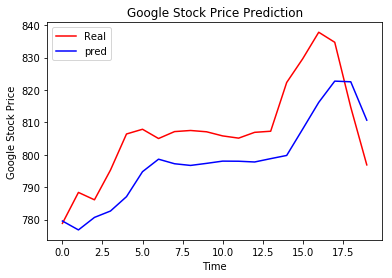

In [70]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color = 'red',label = 'Real')
plt.plot(predicted_stock_price,color = 'blue',label = 'pred')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()